Scratch:

Read in Communities data (summary spreadsheet from GRID3 SEs w/UN PP data):
EG: AFPW-GHA-Communities-Ahafo.1000-20000.summary.xlsx

Read in WQAL lab locations data (filter down to only regional labs)

F.E. community, get distance to all lab locations
Find min distance to any lab; save distance (KM) and nearest lab 

Add to community summary data sheet and re-export

Get filter numbers: num within 60k, 120k, 180k, 240k, >


**NB**: Eventually, add this to the AFPW Ghana Communities data processing sheet - to create all that data in one place

In [1]:
import pandas as pd
import geopandas as gpd
from geopy.distance import distance, lonlat

In [2]:
pd.options.plotting.backend = "matplotlib"

In [3]:
comms_file = "/Users/datascience/Development/aquaya/py-sandbox/assurance-fund/data/AFPW-GHA-Communities-Ahafo.1000-20000.summary.xlsx"
labs_file = "/Users/datascience/Development/aquaya/py-sandbox/assurance-fund/data/GWCL Regional Labs.xlsx"

In [4]:
labs_df = pd.read_excel(labs_file)
labs_df = labs_df.dropna(subset=["Latitude", "Longitude"])
labs_df.shape

(9, 9)

In [5]:
labs_df.head(2)

,Name,Type,Region,District,Community,Latitude,Longitude,StreetAddress,Comments
1,Ashanti Regional Laboratory,regional,Ashanti,Kumasi Metropolitan Assembly,Kumasi,6.583405,-1.619360,"Dadiesoaba street, Kumasi, Ghana",BY 2024
2,Western Regional Laboratory,regional,Western,Sekondi - Takoradi Metropolitan Assembly,Takoradi,4.906113,-1.767554,NaN,Location assigned from approximate center of T...


In [6]:
comms_df = pd.read_excel(comms_file)
comms_df.shape

(38, 20)

In [7]:
comms_df.head(2)

,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,adm2_pcode,settl_pcode,Shape__Area,Shape__Length,approx_center_lat,approx_center_lon,UN_CommunityName,UN_RefName,UN_PopPlaceType,UN_Lat,UN_Lon
0,Ghana,GHA,Built-up Area,3726.278803,3504.478940,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,GH0101000001,0.000131,0.069264,6.943226,-2.806746,NaN,NaN,NaN,NaN,NaN
1,Ghana,GHA,Built-up Area,6285.133574,5911.022605,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,GH0101000002,0.000208,0.103293,6.696384,-2.553219,Akrodie,NaN,Town,6.7,-2.55


## Compute Nearest Labs

In [8]:
for c in comms_df.itertuples():
    min_dist_lab = None
    min_dist = 9999.0
    for l in labs_df.itertuples():
        d = distance((c.approx_center_lat, c.approx_center_lon), (l.Latitude, l.Longitude))
        #print(f"{c.UN_CommunityName} {c.approx_center_lat}, {c.approx_center_lon}\t{l.Name}\t{d}")
        if d < min_dist:
            min_dist = d
            min_dist_lab = l
    if min_dist_lab is None:
        print(f"No min dist for <{c}>!")
    else:
        comms_df.at[c.Index, "NearestRegionalLab"] = min_dist_lab.Name
        comms_df.at[c.Index, "NearestRegionalLab_DistanceKM"] = min_dist.km

In [9]:
comms_df.head(2)

,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,adm2_pcode,...,Shape__Length,approx_center_lat,approx_center_lon,UN_CommunityName,UN_RefName,UN_PopPlaceType,UN_Lat,UN_Lon,NearestRegionalLab,NearestRegionalLab_DistanceKM
0,Ghana,GHA,Built-up Area,3726.278803,3504.478940,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.069264,6.943226,-2.806746,NaN,NaN,NaN,NaN,NaN,Brong Ahafo Regional Laboratory,67.949655
1,Ghana,GHA,Built-up Area,6285.133574,5911.022605,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.103293,6.696384,-2.553219,Akrodie,NaN,Town,6.7,-2.55,Brong Ahafo Regional Laboratory,74.491663


In [10]:
comms_df.tail(2)

,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,adm2_pcode,...,Shape__Length,approx_center_lat,approx_center_lon,UN_CommunityName,UN_RefName,UN_PopPlaceType,UN_Lat,UN_Lon,NearestRegionalLab,NearestRegionalLab_DistanceKM
36,Ghana,GHA,Small Settlement Area,1423.567479,1338.832263,GH,Ahafo,GH01,Tano North Municipal,GH0105,...,0.058292,7.201064,-2.124003,Susanho,NaN,Other,7.216667,-2.116667,Brong Ahafo Regional Laboratory,27.026142
37,Ghana,GHA,Small Settlement Area,2619.350003,2463.438032,GH,Ahafo,GH01,Tano North Municipal,GH0105,...,0.073740,7.261844,-2.134332,Adroba,Adruban,Other,7.266667,-2.133333,Brong Ahafo Regional Laboratory,23.019318


In [11]:
comms_df["NearestRegionalLab"].value_counts()

NearestRegionalLab
Brong Ahafo Regional Laboratory    38
Name: count, dtype: int64

<Axes: >

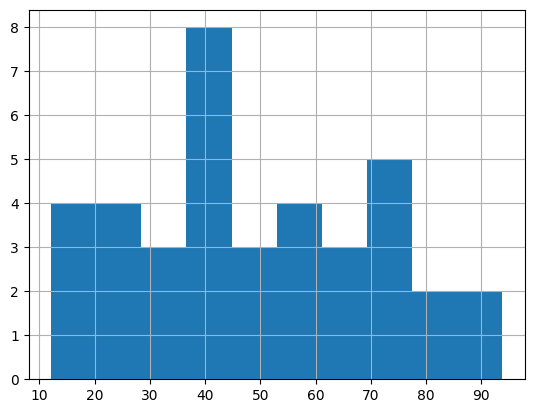

In [12]:
comms_df["NearestRegionalLab_DistanceKM"].hist()

## Distance Stats

In [13]:
limits = [30, 60, 120, 180, 999999]

In [14]:
print(f"{comms_df['adm1_name'].iloc[0]}")
total = comms_df.shape[0]
for dl in limits:
    num_within = (comms_df["NearestRegionalLab_DistanceKM"] < dl).sum()
    print(f"< {dl}km: {num_within} / {total} ({100*num_within/total:0.2f}%)")

Ahafo
< 30km: 9 / 38 (23.68%)
< 60km: 24 / 38 (63.16%)
< 120km: 38 / 38 (100.00%)
< 180km: 38 / 38 (100.00%)
< 999999km: 38 / 38 (100.00%)


In [16]:
comms_df

,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,adm2_pcode,...,Shape__Length,approx_center_lat,approx_center_lon,UN_CommunityName,UN_RefName,UN_PopPlaceType,UN_Lat,UN_Lon,NearestRegionalLab,NearestRegionalLab_DistanceKM
0,Ghana,GHA,Built-up Area,3726.278803,3504.478940,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.069264,6.943226,-2.806746,NaN,NaN,NaN,NaN,NaN,Brong Ahafo Regional Laboratory,67.949655
1,Ghana,GHA,Built-up Area,6285.133574,5911.022605,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.103293,6.696384,-2.553219,Akrodie,NaN,Town,6.700000,-2.550000,Brong Ahafo Regional Laboratory,74.491663
2,Ghana,GHA,Small Settlement Area,3377.718242,3176.665816,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.092888,6.732719,-2.573036,Fahoiden,Fawohoyeden,Other,6.733333,-2.566667,Brong Ahafo Regional Laboratory,71.502409
3,Ghana,GHA,Small Settlement Area,3530.383141,3320.243606,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.069766,6.760560,-2.588338,Ayumaso,NaN,Other,6.766667,-2.583333,Brong Ahafo Regional Laboratory,69.334352
4,Ghana,GHA,Small Settlement Area,1846.327288,1736.428082,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.072918,6.882878,-2.549813,Yamensakrom,NaN,Other,6.866667,-2.566667,Brong Ahafo Regional Laboratory,55.276819
5,Ghana,GHA,Small Settlement Area,1568.722260,1475.346969,GH,Ahafo,GH01,Asunafo North Municipal,GH0101,...,0.048511,6.958001,-2.618577,Bediakukrom,NaN,Other,6.950000,-2.616667,Brong Ahafo Regional Laboratory,52.196882
6,Ghana,GHA,Built-up Area,9016.302974,8479.624207,GH,Ahafo,GH01,Asunafo South,GH0102,...,0.179334,6.694915,-2.444246,Kukuom,NaN,District capital,6.683333,-2.450000,Brong Ahafo Regional Laboratory,71.584670
7,Ghana,GHA,Small Settlement Area,9890.580578,9301.862087,GH,Ahafo,GH01,Asunafo South,GH0102,...,0.104001,6.501401,-2.499047,Sankori,NaN,Other,6.500000,-2.500000,Brong Ahafo Regional Laboratory,93.742391
8,Ghana,GHA,Small Settlement Area,1635.008747,1537.687885,GH,Ahafo,GH01,Asunafo South,GH0102,...,0.039836,6.612897,-2.406692,Anwiam,Anyuam,Other,6.600000,-2.400000,Brong Ahafo Regional Laboratory,79.987750
9,Ghana,GHA,Small Settlement Area,4118.372986,3873.234448,GH,Ahafo,GH01,Asunafo South,GH0102,...,0.079290,6.618128,-2.478787,Kwapong,NaN,Other,6.616667,-2.483333,Brong Ahafo Regional Laboratory,80.646651


In [31]:
comms_df[comms_df["UN_CommunityName"].notna() & 
         comms_df["UN_CommunityName"].str.lower().str.contains("gambia")]

,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,adm2_pcode,...,Shape__Length,approx_center_lat,approx_center_lon,UN_CommunityName,UN_RefName,UN_PopPlaceType,UN_Lat,UN_Lon,NearestRegionalLab,NearestRegionalLab_DistanceKM
22,Ghana,GHA,Small Settlement Area,2134.450498,2007.401278,GH,Ahafo,GH01,Asutifi North,GH0103,...,0.08893,7.059879,-2.653822,Gambia Number 2,NaN,Town,7.066667,-2.65,Brong Ahafo Regional Laboratory,46.708189


## Test Mapbox distances (driving / road travel)

EG:
```python
resp = Directions('mapbox.driving').directions([origin, destination])
driving_routes = resp.geojson()
first_route = driving_routes['features'][0]
```

In [52]:
import json
import mapbox

In [35]:
# The (lon, lat) GEOJSON point features
gambia2_ft = (-2.656115, 7.0623)
ba_lab_ft = (-2.33054, 7.332161)

In [43]:
directions_con = mapbox.Directions(access_token="pk.eyJ1IjoiZHVuY2FuLWFxdWF5YSIsImEiOiJjbHhiem5oMHMwaDZ2MmtzMzE3MDRtbG10In0.Z3c0_caJZMXjbR0bYw-w2w")
directions_con

In [46]:
resp = directions_con.directions(features=[gambia2_ft, ba_lab_ft], profile="mapbox.driving")
resp

/Users/datascience/Development/aquaya/py-sandbox/venv/lib/python3.9/site-packages/mapbox/services/directions.py:41: MapboxDeprecationWarning: Converting v4 profile to v5, use mapbox/driving instead
  warnings.warn('Converting v4 profile to v5, use {} instead'.format(profile),


<Response [200]>

In [48]:
resp_data = resp.geojson()

In [62]:
# Distance: meters; Duration: seconds
resp_data["features"][0]["properties"]

{'distance': 97302.219, 'duration': 9363.027}

In [54]:
json.dumps(resp_data)

'{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "LineString", "coordinates": [[-2.65611, 7.06206], [-2.65594, 7.06207], [-2.6554, 7.06249], [-2.65521, 7.06305], [-2.68197, 7.08522], [-2.69859, 7.09372], [-2.71456, 7.09678], [-2.74574, 7.14701], [-2.75765, 7.16015], [-2.76926, 7.16598], [-2.77134, 7.17588], [-2.78348, 7.20096], [-2.78614, 7.22631], [-2.78168, 7.2365], [-2.77402, 7.23969], [-2.77008, 7.24645], [-2.76354, 7.25134], [-2.75879, 7.25825], [-2.75847, 7.26307], [-2.74032, 7.26149], [-2.73085, 7.26518], [-2.71755, 7.2648], [-2.70839, 7.28729], [-2.70065, 7.29468], [-2.69908, 7.30788], [-2.70606, 7.32125], [-2.70558, 7.32547], [-2.67011, 7.35486], [-2.66108, 7.3692], [-2.65802, 7.37869], [-2.65832, 7.39083], [-2.6548, 7.3971], [-2.63069, 7.42317], [-2.60922, 7.43827], [-2.59556, 7.44185], [-2.58409, 7.45042], [-2.57212, 7.43806], [-2.56385, 7.4337], [-2.54821, 7.43808], [-2.51377, 7.43648], [-2.47546, 7.41006], [-2.4691, 7.40337], [-2.44415, 

In [55]:
resp_data


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [(-2.65611, 7.06206),
     (-2.65594, 7.06207),
     (-2.6554, 7.06249),
     (-2.65521, 7.06305),
     (-2.68197, 7.08522),
     (-2.69859, 7.09372),
     (-2.71456, 7.09678),
     (-2.74574, 7.14701),
     (-2.75765, 7.16015),
     (-2.76926, 7.16598),
     (-2.77134, 7.17588),
     (-2.78348, 7.20096),
     (-2.78614, 7.22631),
     (-2.78168, 7.2365),
     (-2.77402, 7.23969),
     (-2.77008, 7.24645),
     (-2.76354, 7.25134),
     (-2.75879, 7.25825),
     (-2.75847, 7.26307),
     (-2.74032, 7.26149),
     (-2.73085, 7.26518),
     (-2.71755, 7.2648),
     (-2.70839, 7.28729),
     (-2.70065, 7.29468),
     (-2.69908, 7.30788),
     (-2.70606, 7.32125),
     (-2.70558, 7.32547),
     (-2.67011, 7.35486),
     (-2.66108, 7.3692),
     (-2.65802, 7.37869),
     (-2.65832, 7.39083),
     (-2.6548, 7.3971),
     (-2.63069, 7.42317),
     (-2.60922, 7.43827),
     